In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import data
df_og = pd.read_csv(r'../data/processed/Cargo Theft 2020.csv')
df_og

,Year-Quarter,Day,Date,City,State,"City, ST",Country,Commodity,Value,Type of Loss,Location,Additional Information,Recovery?,Time,General Category
0,2020-Q1,Wednesday,1/1/20,Garland,TX,"Garland, TX",USA,Motor oil,100000.0,Cargo theft,Secure yard,No additional details,NaN,Overnight,Automobile & Parts
1,2020-Q1,Wednesday,1/1/20,Memphis,TN,"Memphis, TN",USA,Gas cylinders,10000.0,Pilferage,Truck stop/Gas station,No additional details,NaN,Overnight,Construction & Industrial goods
2,2020-Q1,Wednesday,1/1/20,Ocala,FL,"Ocala, FL",USA,Televisions,137000.0,Cargo theft,Secure yard,No additional details,NaN,Overnight,Consumer electronics
3,2020-Q1,Wednesday,1/1/20,South Holland,IL,"South Holland, IL",USA,Cell phones,100000.0,Cargo theft,Truck stop/Gas station,East Tollway,NaN,NaN,Consumer electronics
4,2020-Q1,Friday,1/3/20,Zion,IL,"Zion, IL",USA,Mixed goods,NaN,Seal break,Truck stop/Gas station,Russel Rd,No loss,Overnight,Mixed cargo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2020-Q3,Sunday,8/30/20,NaN,TN,", TN",USA,Soft drinks,NaN,Cargo theft,Unspecified,No additional details,NaN,NaN,Food & Drinks
479,2020-Q3,Sunday,8/30/20,NaN,TX,", TX",USA,Tires,NaN,Cargo theft,Unspecified,17 & 19 inch,NaN,NaN,Automobile & Parts
480,2020-Q3,Tuesday,9/1/20,NaN,TX,", TX",USA,Tools,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Construction & Industrial goods
481,2020-Q3,Tuesday,9/1/20,NaN,ON,", ON",CAN,Mixed cargo,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Mixed cargo


In [5]:
# copy df
df = df_og.copy()

<AxesSubplot:>

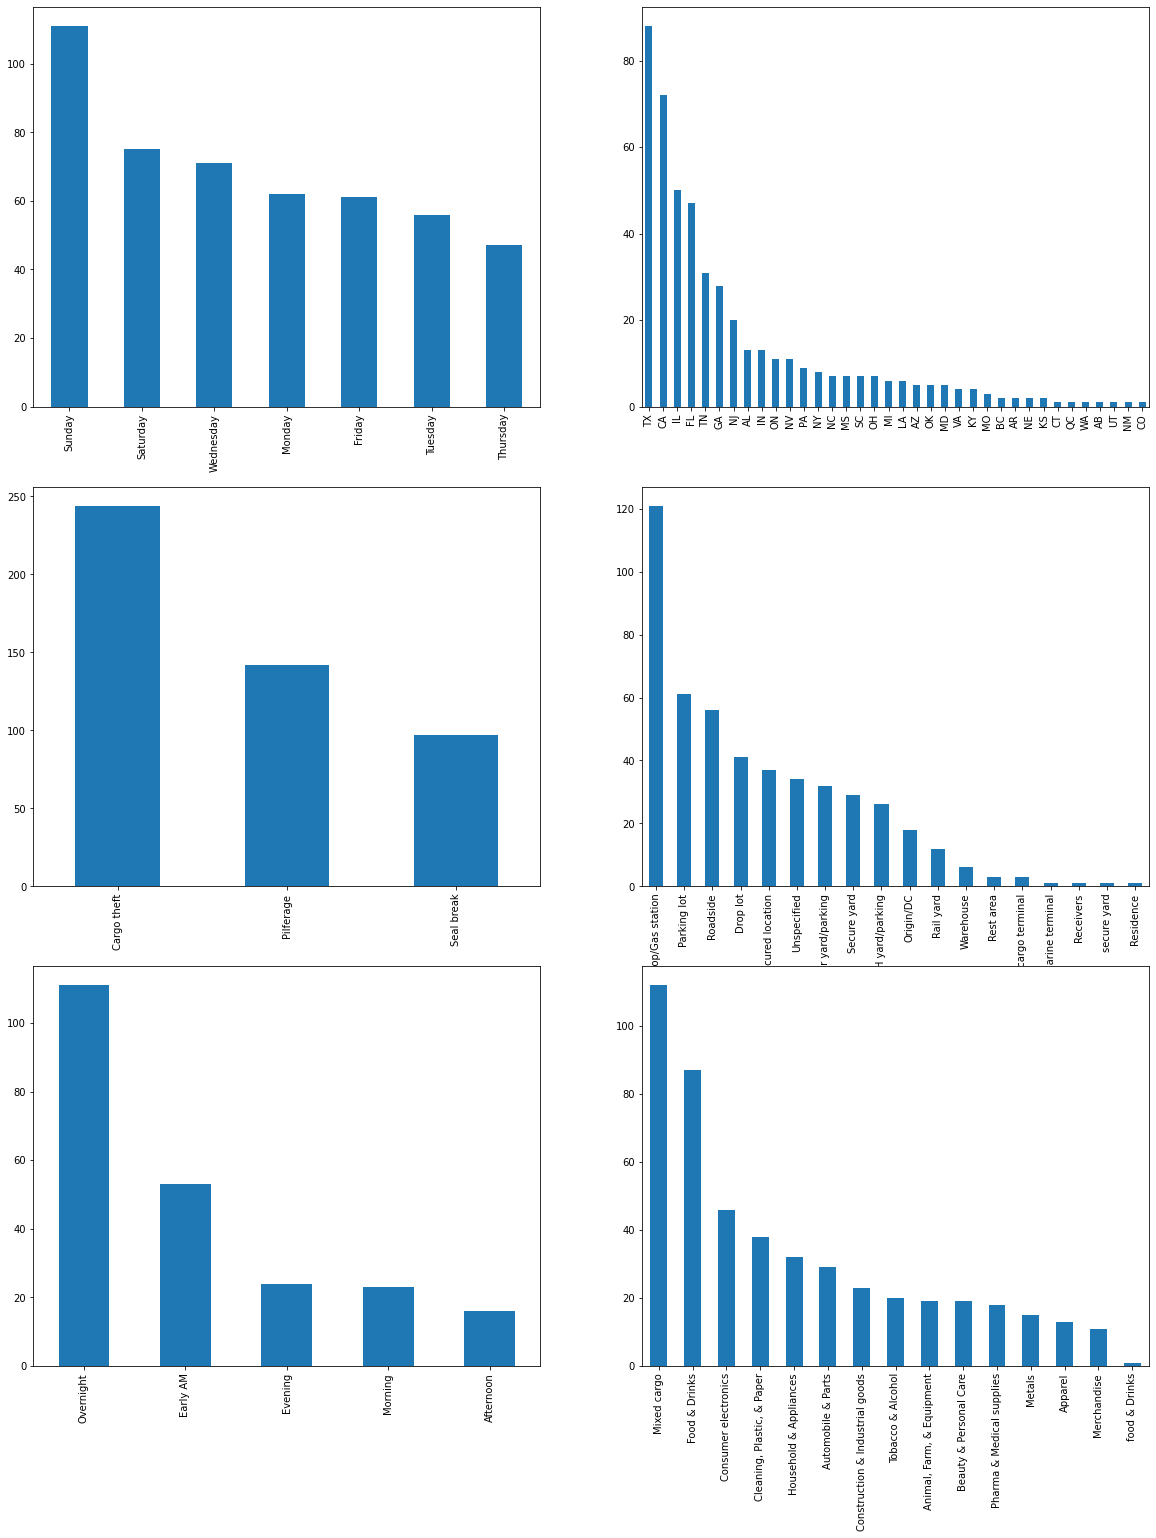

In [31]:
# data overview
fig, [[ax1, ax2],[ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(20,25))

pd.value_counts(df['Day']).plot(kind='bar', ax=ax1)
pd.value_counts(df['State']).plot(kind='bar', ax=ax2)
pd.value_counts(df['Type of Loss']).plot(kind='bar', ax=ax3)
pd.value_counts(df['Location']).plot(kind='bar', ax=ax4)
pd.value_counts(df['Time']).plot(kind='bar', ax=ax5)
pd.value_counts(df['General Category']).plot(kind='bar', ax=ax6)

In [25]:
# group by day
df[df['Day'] == 'Friday'].groupby('Type of Loss')['Date'].count()

Type of Loss
Cargo theft    29
Pilferage      21
Seal break     11
Name: Date, dtype: int64

<AxesSubplot:xlabel='Day'>

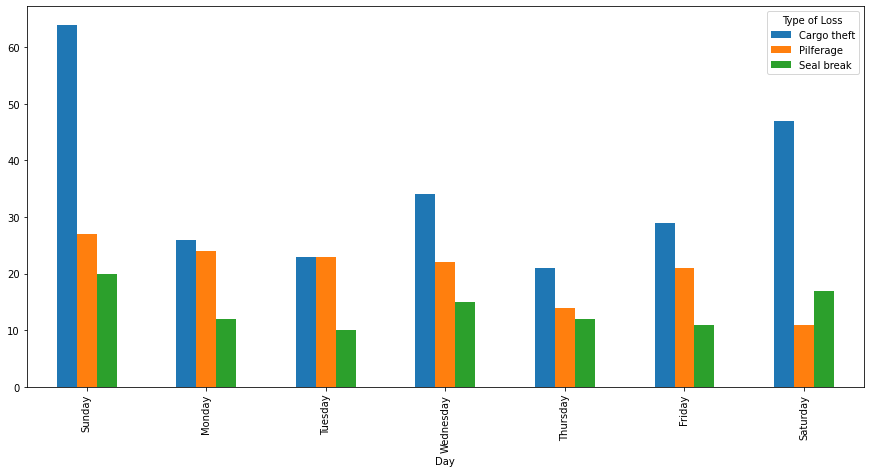

In [47]:
# how many count of each type of loss on every weekday
fig, ax = plt.subplots(figsize=(15,7))
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df.groupby(['Day','Type of Loss']).count()['Date'].unstack().reindex(weekdays).plot(kind = 'bar', ax=ax)

In [166]:
# value: change str to int
df['Value'] = df['Value'].replace('', np.nan)
# df['Value'] = df['Value'].astype(str).astype(float)

In [167]:
# lower case
df = df.apply(lambda x: x.astype(str).str.lower())


# encoding
day = {'monday': 1, 'tuesday': 2, 'wednesday': 3, 'thursday': 4, 'friday': 5, 'saturday': 6 , 'sunday': 7}
category = {'animal, farm, & equipment': 11, 'apparel': 12, 'automobile & parts': 13, 'beauty & personal care': 14, 
            'cleaning, plastic, & paper': 15, 'construction & industrial goods': 16, 'consumer electronics': 17, 
            'currency & firearms': 18, 'food & drinks': 19, 'household & appliances': 20, 'merchandise': 21,
            'metals': 22, 'mixed cargo': 23, 'pharma & medical supplies': 24, 'tobacco & alcohol': 25}
location = {'airline cargo terminal': 31, 'carrier yard/parking': 32, 'drop lot': 33, 'marine terminal': 34, 
            'origin/dc': 35, 'parking lot': 36, 'rail yard': 37, 'receivers': 38, 'residence': 39, 'rest area':40,
            'roadside': 41, 'secure yard': 42, 'truck stop/gas station': 43, 'unsecured location': 44, 
            'unspecified': 45, 'warehouse': 46, 'wh yard/parking': 47}
loss = {'cargo theft': 51, 'pilferage': 52, 'seal break': 53}
time = {'overnight': 61, 'early am': 62, 'evening': 63, 'morning': 64, 'afternoon': 65}



# replace to numerical value
df_new = df.replace({'Day': day, 'General Category': category, 'Location': location, 'Type of Loss': loss, 
                     'Time': time})

                       Day  General Category  Location  Type of Loss
Day               1.000000         -0.027423 -0.041048      -0.08739
General Category -0.027423          1.000000 -0.069218       0.33152
Location         -0.041048         -0.069218  1.000000      -0.07582
Type of Loss     -0.087390          0.331520 -0.075820       1.00000


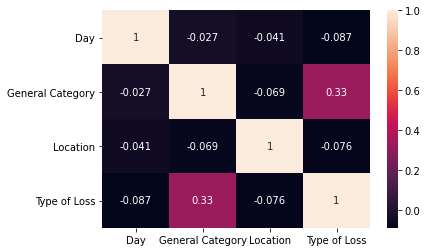

In [169]:
# correlation
df_new_corr = df_new[['Day','General Category','Location','Type of Loss','Value']]
corrMatrix  = df_new_corr.corr()
print(corrMatrix)

# plot corr
sns.heatmap(corrMatrix, annot=True)
plt.show()